In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as mp, seaborn
import scipy.stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 變數分類(屬質/屬量)

In [5]:
quantitative = [feature for feature in train.columns if train.dtypes[feature] != 'object']
quantitative.remove('Id')
quantitative.remove('SalePrice')
qualitative = [feature for feature in train.columns if train.dtypes[feature] == 'object'] 
print("Number of quantitative feature = ",len(quantitative))
print("Number of qualitative feature = ",len(qualitative))

Number of quantitative feature =  36
Number of qualitative feature =  43


In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 房屋售價直方圖

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


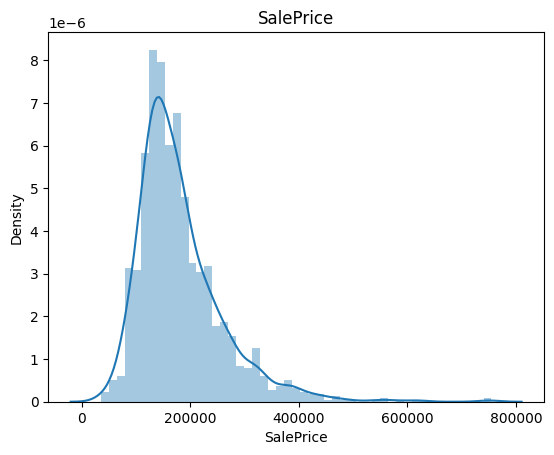

In [7]:
plt.figure()
sns.distplot(train['SalePrice'])
plt.title('SalePrice')
fig = plt.gcf()
plt.show()
fig.savefig('DensityOfSalePrice.png')

In [8]:
print('峰度(Kurtosis): ', train['SalePrice'].kurt())
print('偏度(Skewness): ', train['SalePrice'].skew())

峰度(Kurtosis):  6.536281860064529
偏度(Skewness):  1.8828757597682129


# 轉換後房屋售價直方圖

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


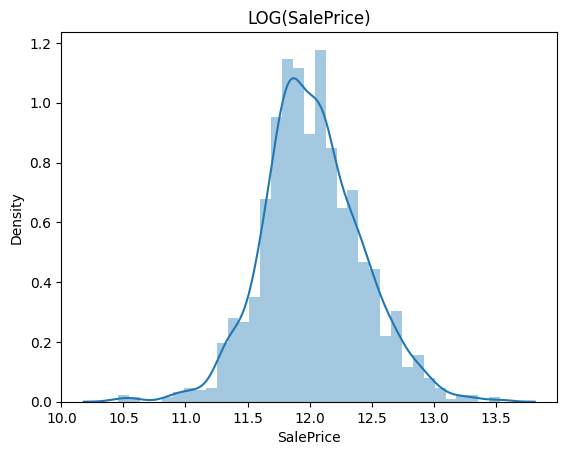

In [9]:
plt.figure()
sns.distplot(np.log(train['SalePrice']))
plt.title('LOG(SalePrice)')
fig = plt.gcf()
plt.show()
fig.savefig('ln_DensityOfSalePrice.png')

In [10]:
print('偏度(Skewness): ', np.log(train['SalePrice']).skew())

偏度(Skewness):  0.12133506220520406


# 屬量變數直方圖

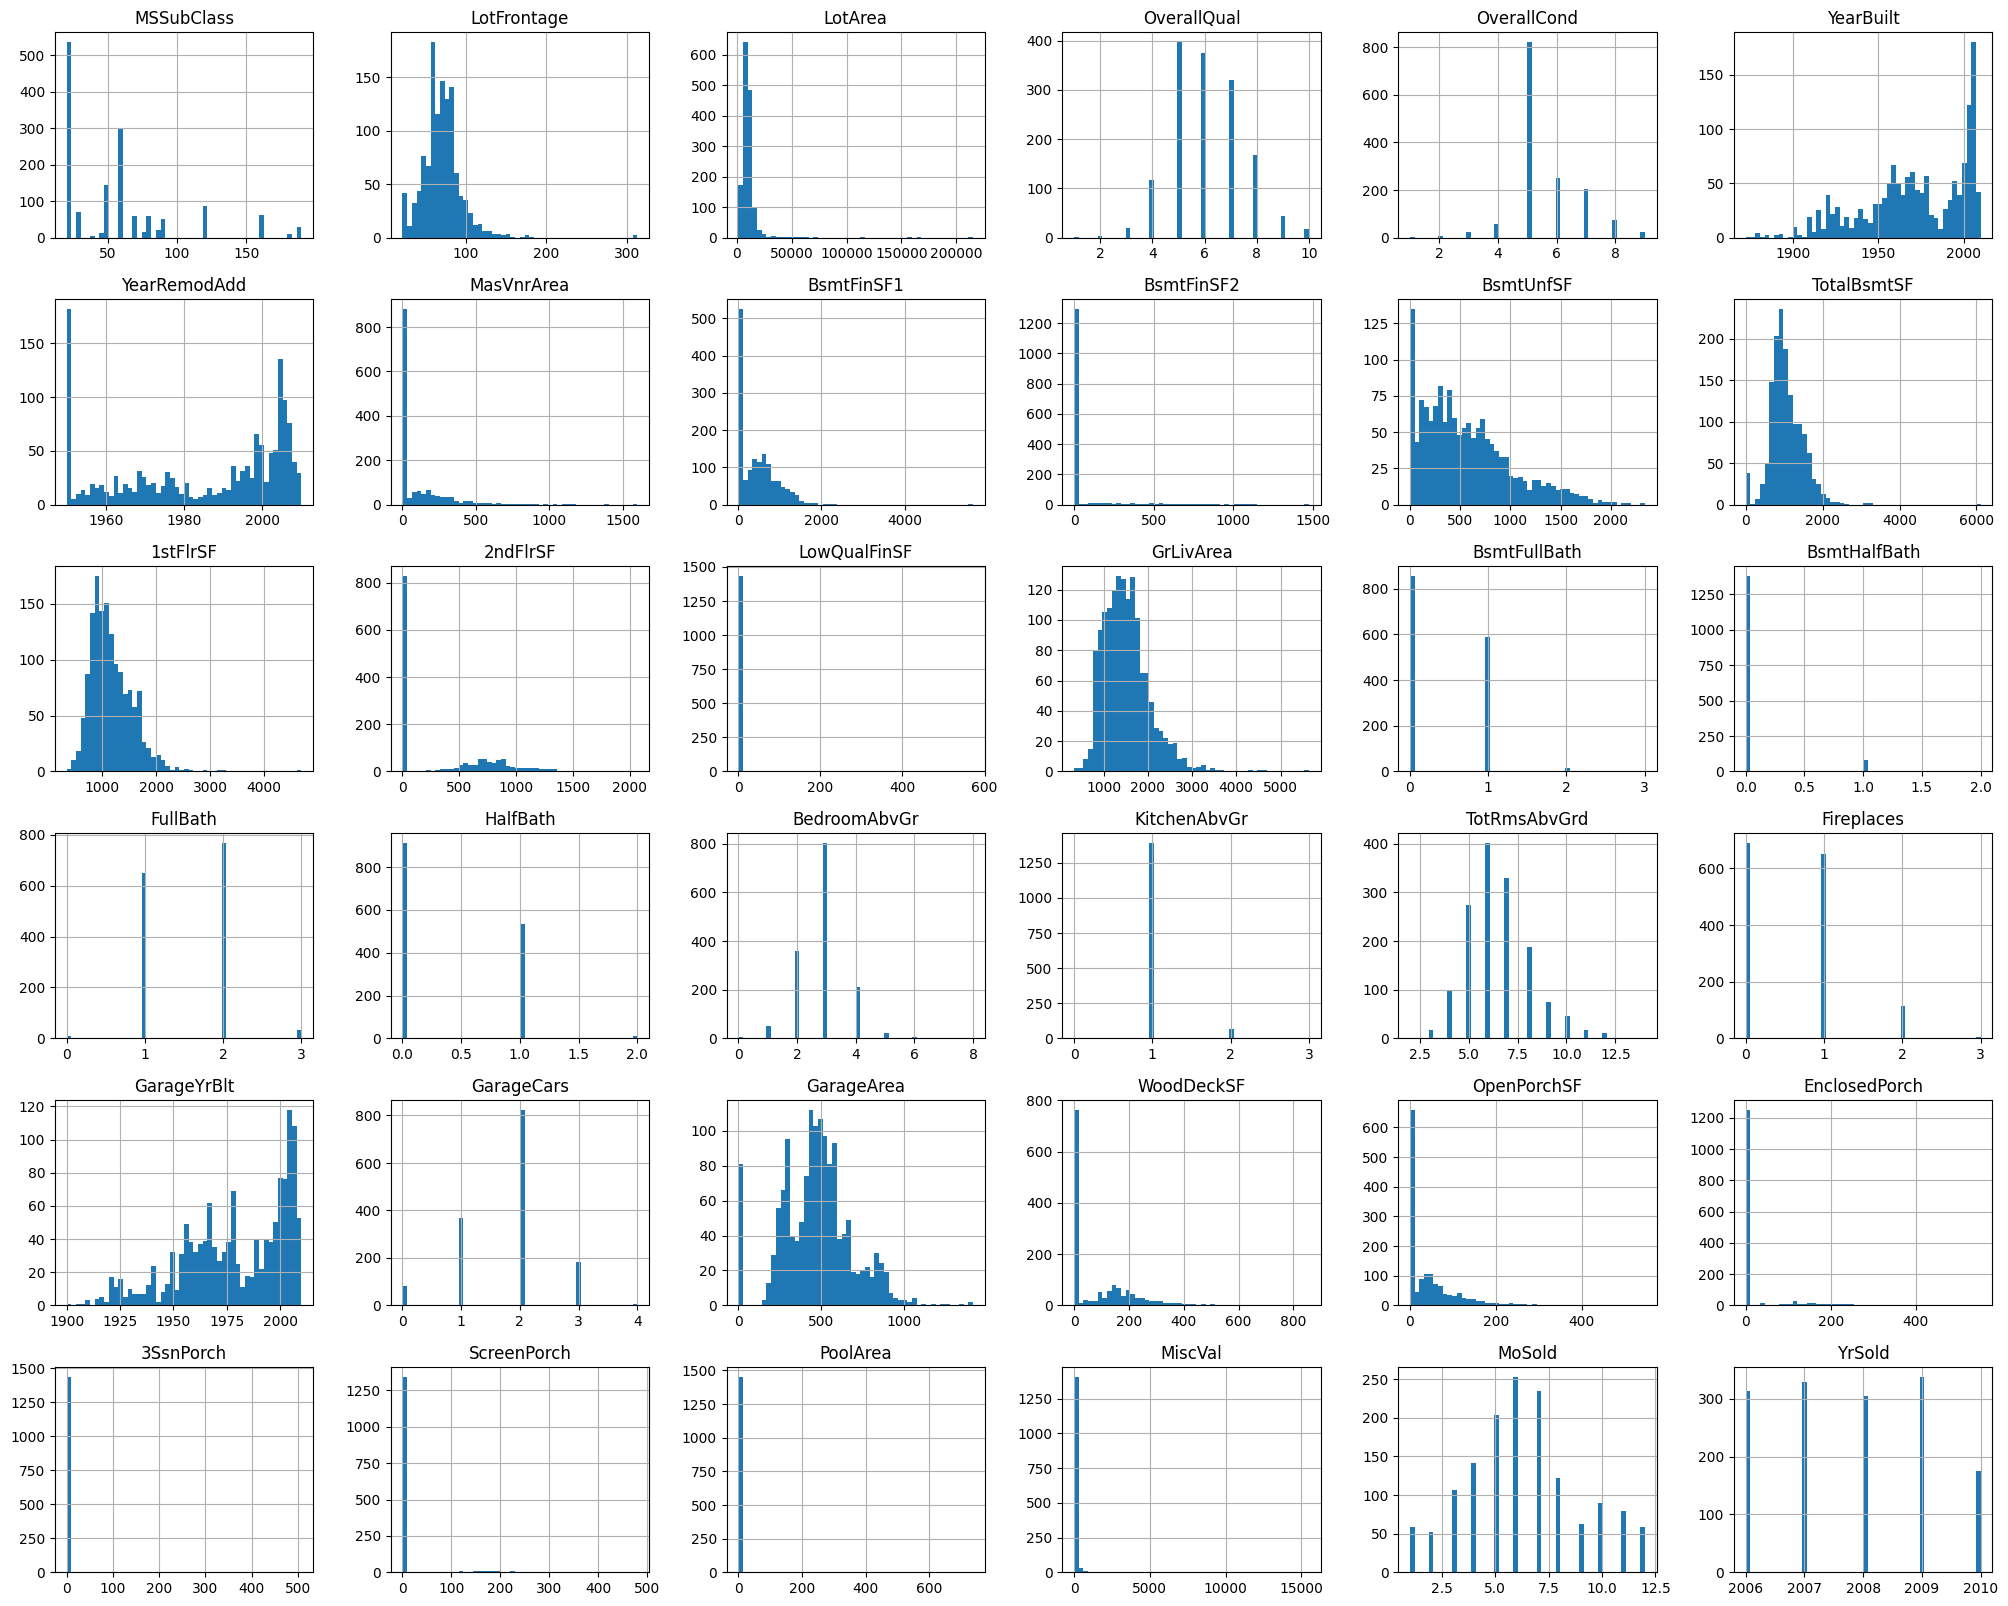

In [11]:
train[quantitative].hist(bins = 50, figsize = (25, 20))
fig = plt.gcf()
plt.show()
fig.savefig('AllHist.png')

# 屬量變數與售價分佈圖

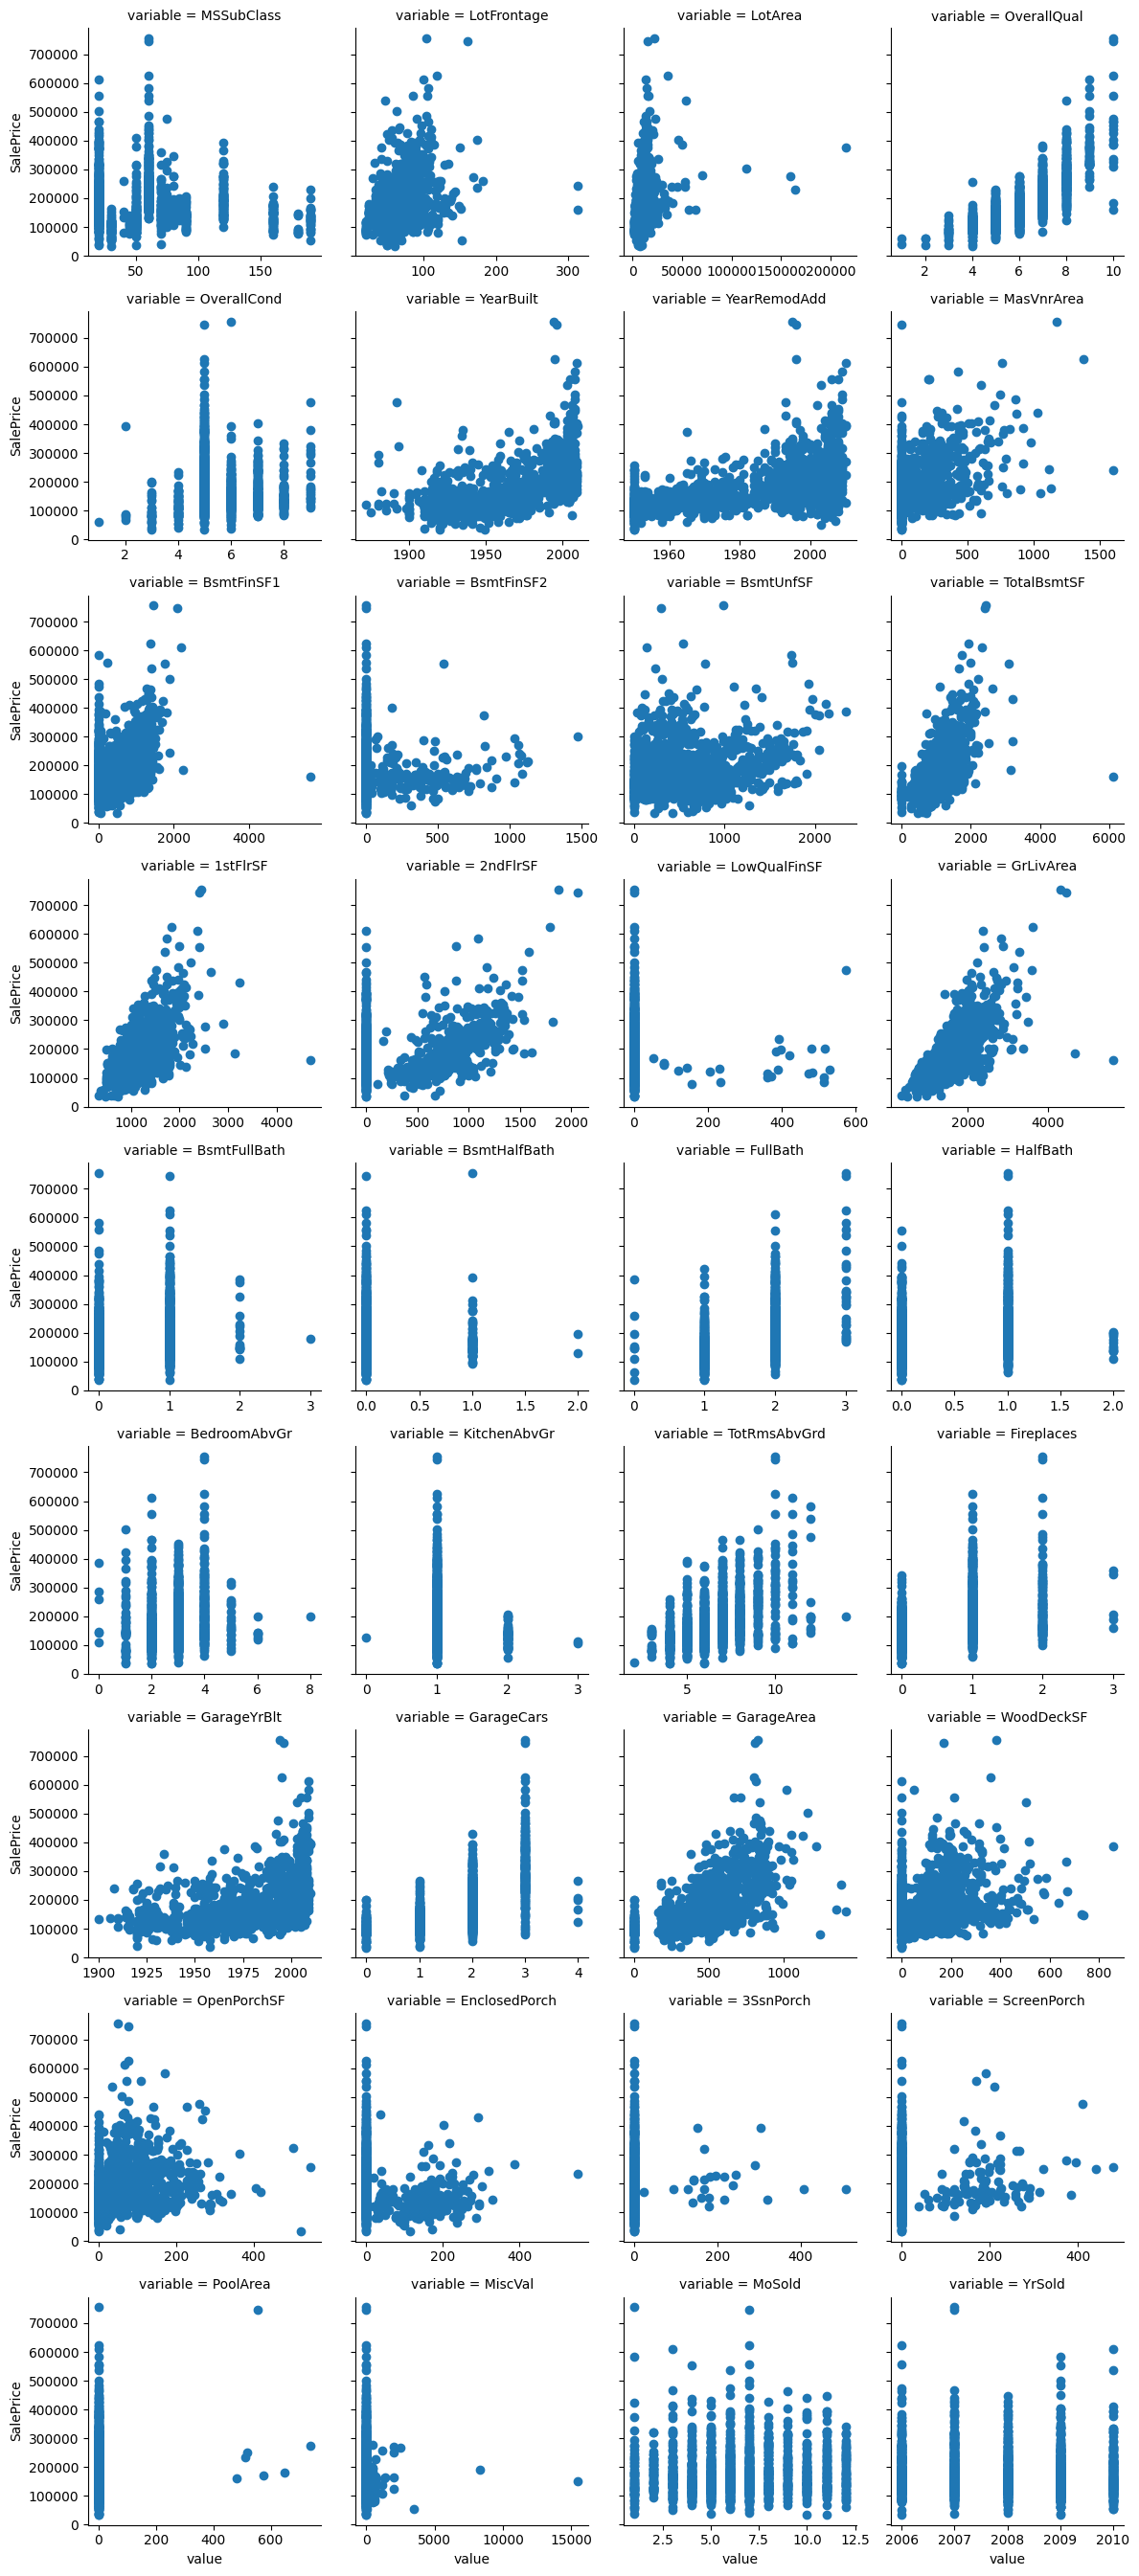

In [12]:
m_cont = pd.melt(train, id_vars='SalePrice', value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=True)
g.map(plt.scatter, 'value', 'SalePrice')

# 屬量變數與房屋售價的pearson相關係數(排序)

In [33]:
train.corr(method = 'pearson')['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# 屬質變數與房屋售價的spearman相關係數(排序)

In [34]:
cor_sp = train.corr(method = 'spearman')['SalePrice'].sort_values(ascending = False)
print(cor_sp)

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePr

# 遺失值處理

In [35]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


# 遺失值處理加相關係數

In [36]:
df_total = pd.DataFrame({'Feature': total.index, 'Total':total.values})
df_percent = pd.DataFrame({'Feature': percent.index, 'percent':percent.values})
df_cor = pd.DataFrame({'Feature': cor_sp.index, 'Spearman correlation coefficient':cor_sp.values})
missing_data0 = pd.merge(df_total, df_percent)
missing_data1 = pd.merge(missing_data0, df_cor)
missing_data1

,Feature,Total,percent,Spearman correlation coefficient
0,LotFrontage,259,0.177397,0.409076
1,GarageYrBlt,81,0.055479,0.593788
2,MasVnrArea,8,0.005479,0.421309
3,Id,0,0.000000,-0.018546
4,Fireplaces,0,0.000000,0.519247
5,KitchenAbvGr,0,0.000000,-0.164826
6,BedroomAbvGr,0,0.000000,0.234907
7,HalfBath,0,0.000000,0.343008
8,FullBath,0,0.000000,0.635957
9,BsmtHalfBath,0,0.000000,-0.012189


# 訓練集測試集合併

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.concat([train, test], axis=0, ignore_index=True)
train.shape, test.shape, full.shape

((1460, 81), (1459, 80), (2919, 81))

# LotFrontage遺失值處理

In [38]:
full['LotAreaCut'] = pd.qcut(full['LotArea'], 10)
full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].agg(['count', 'mean', 'median'])
full['LotFrontage'] = full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
full['LotFrontage'] = full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [39]:
full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].agg(['count', 'mean', 'median'])

count       mean  median
LotAreaCut          Neighborhood                          
(1299.999, 4922.4]  Blmngtn          28  45.785714    43.0
                    Blueste          10  27.300000    24.0
                    BrDale           30  21.500000    21.0
                    BrkSide           4  52.000000    51.0
                    ClearCr           2  34.000000    34.0
...                                 ...        ...     ...
(14300.6, 215245.0] SawyerW           7  86.142857    90.0
                    Somerst           5  61.600000    49.0
                    StoneBr          11  73.363636    63.0
                    Timber           18  93.611111    89.0
                    Veenker          13  90.615385    95.0

[250 rows x 3 columns]

# 類別變數遺失值處理

In [40]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    full[col] = full[col].fillna('None')

# 連續變數遺失值處理

In [41]:
cols2 = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols2:
    full[col] = full[col].fillna(0)

# 剩餘類別變數遺失值處理

In [42]:
cols3 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols3:
    full[col] = full[col].fillna(full[col].mode()[0])

# 檢查遺失值

In [43]:
full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1459
dtype: int64

# 將部分數值資料轉為類別變數

In [44]:
Num_to_Str = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for col in Num_to_Str:
    full[col] = full[col].astype(str)

# 將類別變數有序重新編碼

In [45]:
def map_values(df):
    df['MSSubClass'] = df['MSSubClass'].map({'180':1,
                                             '30':2, '45':2,
                                             '190':3, '50':3, '90':3, 
                                             '85':4, '40':4, '160':4, 
                                             '70':5, '20':5, '75':5, '80':5, '150':5,
                                             '120': 6, '60':6})

    df['MSZoning'] = df['MSZoning'].map({'C (all)':1, 'RM':2, 'RH':2, 'RL':3, 'FV':4})

    df['Neighborhood'] = df['Neighborhood'].map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

    df['HouseStyle'] = df['HouseStyle'].map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

    df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})

    df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['ExterCond'] = df['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Foundation'] = df['Foundation'].map({'Slab':1, 'BrkTil':2, 'CBlock':2, 'Stone':2, 'Wood':3, 'PConc':4})

    df['BsmtQual'] = df['BsmtQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['BsmtCond'] = df['BsmtCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['BsmtExposure'] = df['BsmtExposure'].map({'None':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})

    df['BsmtFinType1'] = df['BsmtFinType1'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    df['BsmtFinType2'] = df['BsmtFinType2'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

    df['HeatingQC'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['KitchenQual'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Functional'] = df['Functional'].map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})

    df['FireplaceQu'] = df['FireplaceQu'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['GarageFinish'] = df['GarageFinish'].map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

    df['GarageQual'] = df['GarageQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['GarageCond'] = df['GarageCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

    df['PavedDrive'] = df['PavedDrive'].map({'N':1, 'P':2, 'Y':3})

    df['PoolQC'] = df['PoolQC'].map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

    df['Fence'] = df['Fence'].map({'None':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5})

map_values(full)

# 將時間變數重新編碼


In [46]:
lab = LabelEncoder()
full['YearBuilt'] = lab.fit_transform(full['YearBuilt'])
full['YearRemodAdd'] = lab.fit_transform(full['YearRemodAdd'])
full['GarageYrBlt'] = lab.fit_transform(full['GarageYrBlt'])

# 將售價和ID移除並且對資料進行複製

In [47]:
full.drop(['SalePrice', 'Id'], axis=1, inplace=True)

full_fe = full.copy()

In [48]:
full_numeric = full_fe.select_dtypes(include=[np.number])
skew = full_numeric.apply(lambda x: x.skew())
skew_features = skew[abs(skew) >= 1].index
full_fe[skew_features] = np.log1p(full_fe[skew_features])

# dummy 

In [49]:
full_fe = pd.get_dummies(full_fe)

# RobustScaler

In [50]:
scaler = RobustScaler()
n_train = train.shape[0]
train_X = full_fe[:n_train]
test_X = full_fe[n_train:]
train_y = train['SalePrice']
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.log(train_y)

# Lasso選模

<Figure size 640x480 with 0 Axes>

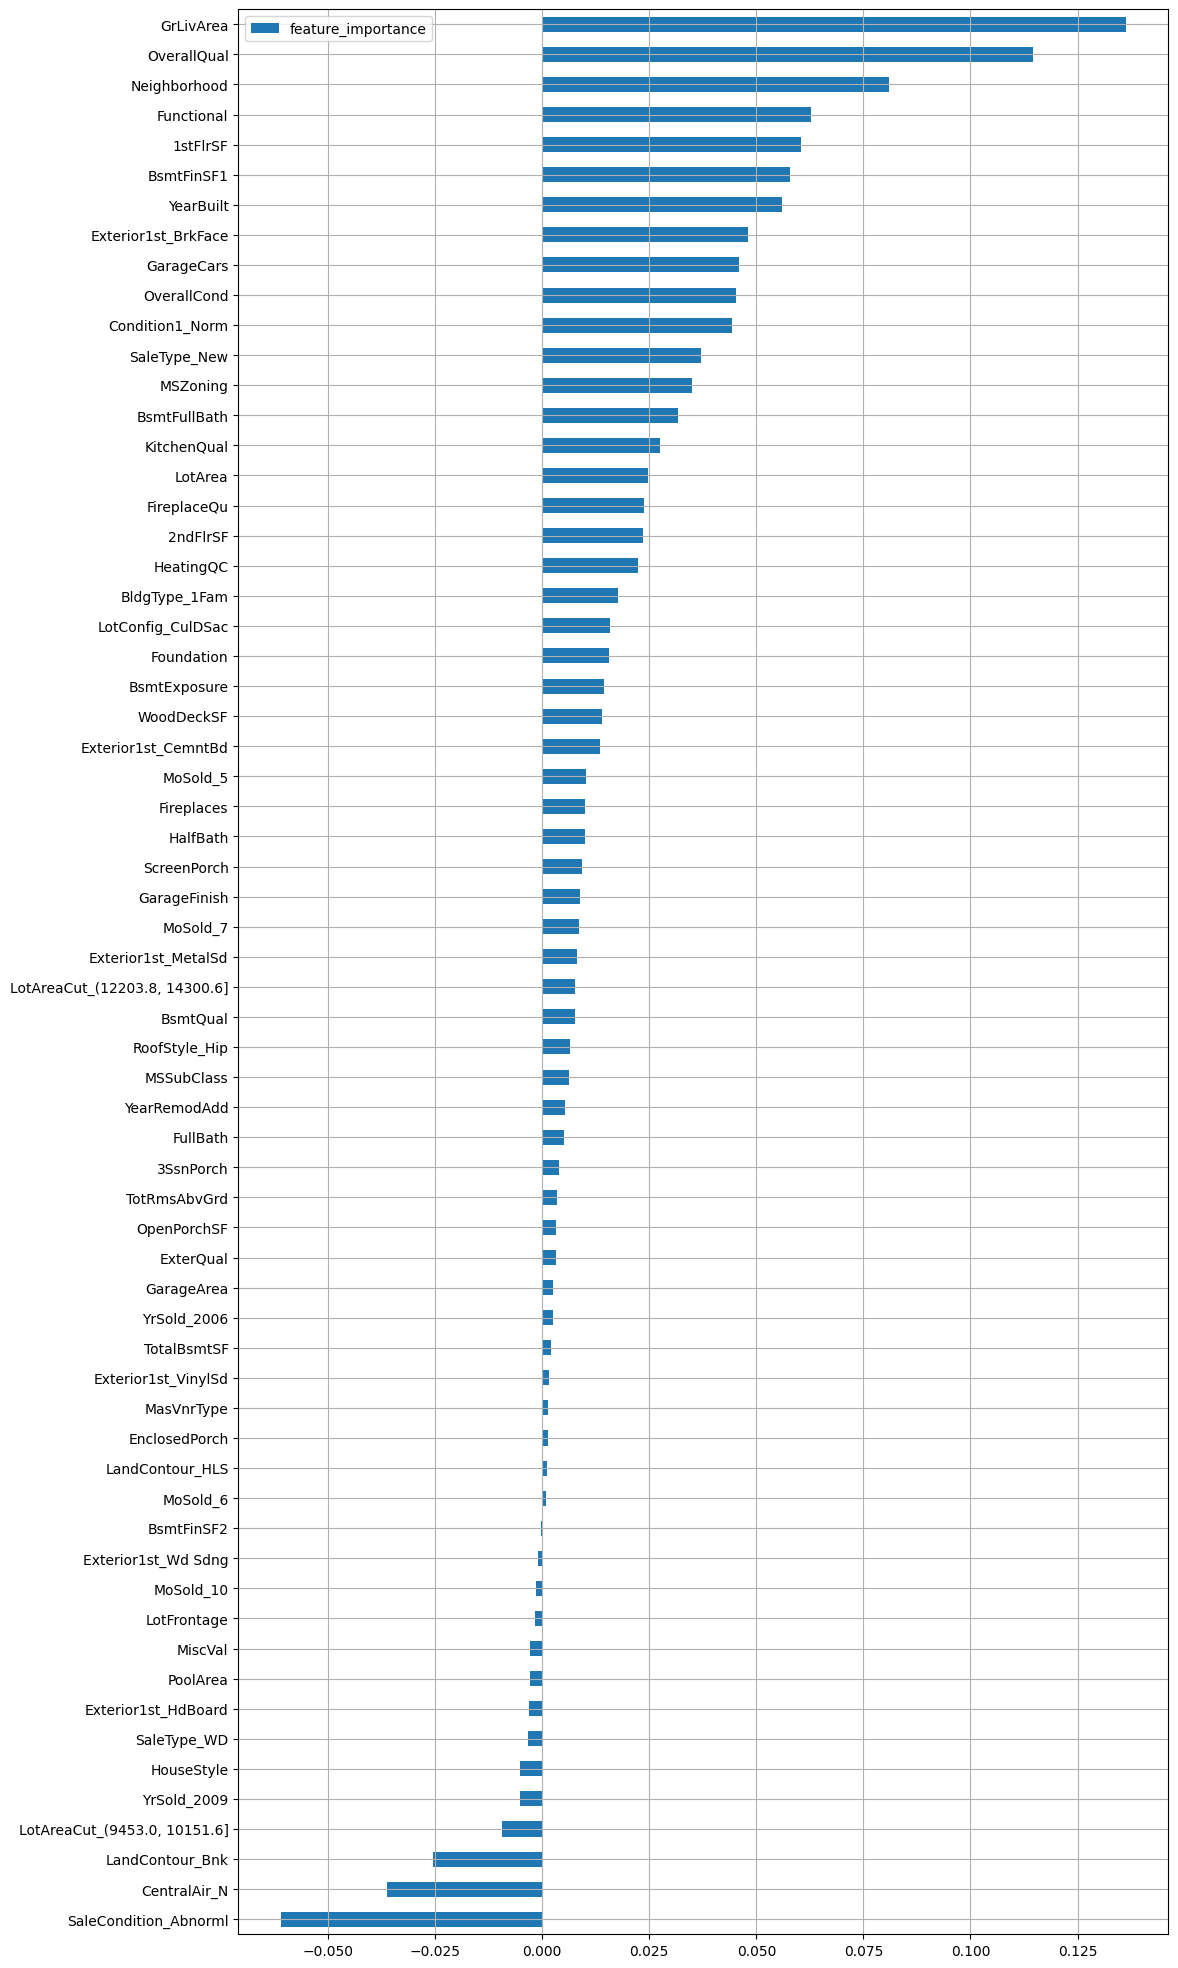

In [51]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_X, train_y)
Lasso(alpha=0.001, random_state=1,)
lasso_fi = pd.DataFrame({'feature_importance':lasso.coef_}, index=full_fe.columns)
lasso_fi.sort_values('feature_importance', ascending=False)
plt.figure()
lasso_fi[lasso_fi['feature_importance'] != 0].sort_values('feature_importance').plot(kind='barh', figsize=(12, 25))
plt.grid()
fig = plt.gcf()
plt.show()
fig.savefig('AllHist.png')

In [52]:
def add_feature(X):
    X['TotalHouse'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
    X['TotalArea'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF'] + X['GarageArea']
    X['TotalQuality'] = X['OverallQual'] + X['OverallCond']

    X['TotalHouse_OverallQual'] = X['TotalHouse'] * X['OverallQual']
    X['GrLivArea_OverallQual'] = X['GrLivArea'] * X['OverallQual']
    X['MSZoning_TotalHouse'] = X['MSZoning'] * X['TotalHouse']
    X['MSZoning_OverallQual'] = X['MSZoning'] + X['OverallQual']
    X['MSZoning_YearBuilt'] = X['MSZoning'] + X['YearBuilt']
    X['Neighborhood_TotalHouse'] = X['Neighborhood'] * X['TotalHouse']
    X['Neighborhood_OverallQual'] = X['Neighborhood'] + X['OverallQual']
    X['Neighborhood_YearBuilt'] = X['Neighborhood'] + X['YearBuilt']
    X['BsmtFinSF1_OverallQual'] = X['BsmtFinSF1'] * X['OverallQual']
    X['Functional_TotalHouse'] = X['Functional'] * X['TotalHouse']
    X['Functional_OverallQual'] = X['Functional'] + X['OverallQual']
    X['LotArea_OverallQual'] = X['LotArea'] * X['OverallQual']
    X['LotArea_TotalHouse'] = X['LotArea'] + X['TotalHouse']

    X['Bsmt'] = X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['BsmtUnfSF']
    X['PorchArea'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']

    X['TotalPlace'] = X['TotalArea'] + X['PorchArea']

full_numeric1 = full_fe1.select_dtypes(include=[np.number])
skew1 = full_numeric1.apply(lambda x: x.skew())
skew_features1 = skew1[abs(skew1) >= 1].index
full_fe1[skew_features1] = np.log1p(full_fe1[skew_features1])

full_fe1 = pd.get_dummies(full_fe1)

n_train = train.shape[0]
train_X = full_fe1[:n_train]
test_X = full_fe1[n_train:]
train_y = train.SalePrice

scaler = RobustScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.log(train_y)
train_X[:5]

array([[ 0.5       ,  0.        , -0.25751586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.46467123, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.        , -0.10076115, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.53532877, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.63465113, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
train_X.shape, test_X.shape

((1460, 232), (1459, 232))

# PCA

In [55]:
pca = PCA(n_components=0.95)
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)
train_X.shape, test_X.shape

((1458, 205), (1459, 205))

# 定義RMSE

In [56]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return rmse

# 各模型誤差

In [57]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
cv_results = []
for name, model in zip(names, models):
    score = rmse_cv(model, train_X, train_y)
    cv_results.append(score)
    print('%s: %f (%f)' % (name, score.mean(), score.std()))

LR: 0.130595 (0.013064)
Ridge: 0.130578 (0.013063)
Lasso: 0.133609 (0.013085)
RF: 0.141895 (0.011957)
GBR: 0.132231 (0.009936)
SVR: 0.138392 (0.014270)


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinSVR: 0.133444 (0.016516)
Ela: 0.130388 (0.013119)
SGD: 0.132512 (0.012221)
Bay: 0.130185 (0.013062)
Ker: 0.123965 (0.006965)
Extra: 0.133089 (0.012895)


# 網格選超參數

In [32]:
def grid(model, X, y, params):
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X, y)
    print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))

In [165]:
params_lasso = {'alpha': [0.0004,0.0005,0.0007,0.0009], 'max_iter':[10000]}
grid(Lasso(), train_X, train_y, params_lasso)

{'alpha': 0.0009, 'max_iter': 10000} 0.12877046617655602


In [166]:
params_ridge = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(Ridge(), train_X, train_y, params_ridge)

{'alpha': 90} 0.12754819448237356


In [163]:
params_svr = {'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
grid(SVR(), train_X, train_y, params_svr)

{'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'} 0.1270118555796848


In [164]:
params_ker = {'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge(), train_X, train_y, params_ker)

{'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.11815350564455394


In [167]:
params_ela = {'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]}
grid(ElasticNet(), train_X, train_y, params_ela)

{'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': 10000} 0.1281817597378729


In [169]:
lasso = Lasso(alpha=0.0009, max_iter=10000)
ridge = Ridge(alpha=90)
svr = SVR(C=15, epsilon=0.008, gamma= 0.0004, kernel='rbf')
ker = KernelRidge(alpha=0.4, coef0=1, degree=3, kernel='polynomial')
ela = ElasticNet(alpha=0.004,l1_ratio=0.3,max_iter=10000)
bay = BayesianRidge()

# Averaging

In [170]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self, mods, weight):
        self.mods = mods
        self.weight = weight

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.mods]
        for model in self.models_:
            model.fit(X, y)
        return self

    def predict(self, X):
        results = [model.predict(X) for model in self.models_]

        pre = np.dot(np.array(self.weight), np.array(results))
        return pre


model_weight = [0.05, 0.2, 0.3, 0.35, 0.03, 0.07]
models = [lasso, ridge, svr, ker, ela, bay]
avg_w = AverageWeight(models, model_weight)


avg_score = rmse_cv(avg_w, train_X, train_y)
print(avg_score.mean())


avg_w2 = AverageWeight(mods=[svr, ker], weight=[0.45, 0.55])
avg2_score = rmse_cv(avg_w2, train_X, train_y)
print(avg2_score.mean())


0.12071169286143937
0.11958645030886379


In [171]:
avg_w2.fit(train_X, train_y)
y_pred = np.exp(avg_w2.predict(test_X))
result = pd.DataFrame({'Id':test['Id'], 'SalePrice':y_pred})
result.to_csv('avg.csv', index=False)

# VotingRegressor

In [172]:
en_reg = VotingRegressor([
    ('lasso', lasso), 
    ('ridge', ridge),
    ('ela', ela),
    ('svr', svr),
    ('ker', ker),
    ('bay', bay) 
])
en_reg.fit(train_X, train_y)


VotingRegressor(estimators=[('lasso', Lasso(alpha=0.0009, max_iter=10000)),
                            ('ridge', Ridge(alpha=90)),
                            ('ela',
                             ElasticNet(alpha=0.004, l1_ratio=0.3,
                                        max_iter=10000)),
                            ('svr', SVR(C=15, epsilon=0.008, gamma=0.0004)),
                            ('ker',
                             KernelRidge(alpha=0.4, kernel='polynomial')),
                            ('bay', BayesianRidge())])

In [173]:
y_pred = np.exp(en_reg.predict(test_X))
result = pd.DataFrame({'Id':test['Id'], 'SalePrice':y_pred})
result.to_csv('voting.csv', index=False)

# StackingRegressor()

In [174]:
class stacking(BaseEstimator, RegressorMixin):
    def __init__(self, base_models, stack_model):
        self.base_models = base_models
        self.stack_model = stack_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self, X, y):
     
        X = np.array(X)
        y = np.array(y)

        self.saved_models = [list() for model in self.base_models]
        oof_train = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_idx, val_idx in self.kf.split(X, y):
                fit_model = clone(model)            
                fit_model.fit(X[train_idx], y[train_idx])
                self.saved_models[i].append(fit_model)
                oof_train[val_idx, i] = fit_model.predict(X[val_idx])

        self.stack_model.fit(oof_train, y)
        return self

    def predict(self, X):
        X = np.array(X)
        oof_test = np.zeros((X.shape[0], len(self.base_models)))

        for i, model in enumerate(self.saved_models):
            model_pred = np.column_stack([fit_model.predict(X) for fit_model in model])
            oof_test[:, i] = model_pred.mean(1)

        return self.stack_model.predict(oof_test)


stack_model = stacking(base_models=[lasso, ridge, svr, ker, ela, bay], stack_model=ker)
stack_score = rmse_cv(stack_model, train_X, train_y)
print(stack_score.mean())


stack_model.fit(train_X, train_y)
stack_pred =np.exp(stack_model.predict(test_X))
result_s = pd.DataFrame({'Id':test['Id'], 'SalePrice':stack_pred})
result_s.to_csv('stack.csv', index=False)


0.12344692866138303


# GBR

In [209]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [206]:
gb_reg = {'max_depth':[2, 4, 6, 8],'n_estimators':[20, 40, 80, 120, 150]}
grid(GradientBoostingRegressor(), train_X, train_y, gb_reg)

{'max_depth': 4, 'n_estimators': 150} 0.12455867911566285


In [211]:
gb_reg = GradientBoostingRegressor(max_depth = 4, n_estimators = 120)
gb_reg.fit(train_X, train_y)
gb_reg.score(train_X, train_y)

0.9802649931761395

In [208]:
gb_reg.fit(train_X, train_y)
gb_reg_pred =np.exp(gb_reg.predict(test_X))
result_s = pd.DataFrame({'Id':test['Id'], 'SalePrice':gb_reg_pred})
result_s.to_csv('GBR.csv', index=False)